In [1]:
import pandas as pd
from eventclass import *
import seaborn as sns
import matplotlib.pyplot as plt
from natsort import natsorted

In [2]:
df = pd.read_csv('ROCResults.csv')
df['gw'] = df['gender']+df['weapon']
season_ratings = {x:x[0] for x in df.classification.unique()}
df['classification_season'] = df['classification'].map(season_ratings)

In [3]:
tournament_names = df.tournament.unique()
tournaments = []
levels = []
events = []
possible_classifications = []
for tournament in tournament_names:
    tournament_df = df[df.tournament==tournament]
    tournament_levels = tournament_df.level.unique()
    for level in tournament_levels:
        level_df = tournament_df[tournament_df.level==level]
        level_events = level_df.gw.unique()
        for event in level_events:
            event_df = level_df[level_df.gw==event]
            possible_classification = get_event_rating(event_df.classification_season.to_list())
            tournaments.append(tournament)
            levels.append(level)
            events.append(event)
            possible_classifications.append(possible_classification)
classification_df = pd.DataFrame.from_dict({'tournament':tournaments,'level':levels,'event':events,'possible_classification':possible_classifications})

AttributeError: 'Rectangle' object has no property 'legend'

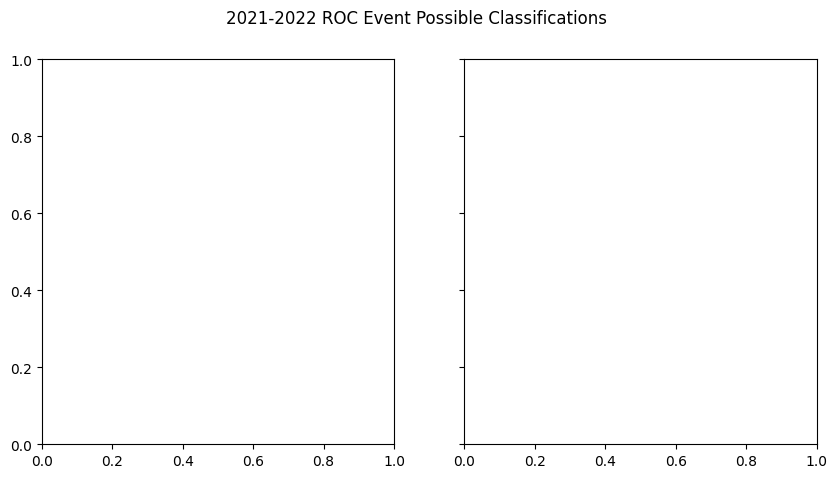

In [11]:
ORDER = natsorted(classification_df.possible_classification.unique())
fig, axes = plt.subplots(1,2,figsize=(10,5),sharey=True)
fig.suptitle('2021-2022 ROC Event Possible Classifications')
div_ii = classification_df[classification_df.level=='DivII']
sns.countplot(ax=axes[0],data=div_ii,x='possible_classification',hue='event',order=ORDER,legend=False)
div_ia = classification_df[classification_df.level=='DivIA']
sns.countplot(ax=axes[1],data=div_ia,x='possible_classification',hue='event',order=ORDER,legend=False)